#  Python for Data Analysis

## Chapter 1 - Preliminaries

This book is concerned with the nuts and bolts of manipulating, processing, cleaning, and crunching data in Python.

### Essential Python libraries

#### Numpy

NumPy, short for Numerical Python, is the foundational package for scientific com- puting in Python.

- A fast and efficient multidimensional array object ndarray
- Functions for performing element-wise computations with arrays or mathematical
operations between arrays
- Tools for reading and writing array-based data sets to disk
- Linear algebra operations, Fourier transform, and random number generation
- Tools for integrating connecting C, C++, and Fortran code to Python

#### pandas

pandas provides rich data structures and functions designed to make working with structured data fast, easy, and expressive.

#### matplotlib

matplotlib is the most popular Python library for producing plots and other 2D data 
visualizations.

#### IPython

IPython is the component in the standard scientific Python toolset that ties everything together. A Kernel for Jupyter.

#### SciPy

SciPy is a collection of packages addressing a number of different standard problem domains in scientific computing.

- scipy.integrate: numerical integration routines and differential equation solvers
- scipy.linalg: linear algebra routines and matrix decompositions extending be-
yond those provided in numpy.linalg.
- scipy.optimize: function optimizers (minimizers) and root finding algorithms
- scipy.signal: signal processing tools
- scipy.sparse: sparse matrices and sparse linear system solvers
- scipy.special: wrapper around SPECFUN, a Fortran library implementing many common mathematical functions, such as the gamma function
- scipy.stats: standard continuous and discrete probability distributions (density functions, samplers, continuous distribution functions), various statistical tests, and more descriptive statistics
- scipy.weave: tool for using inline C++ code to accelerate array computations

#### Installation and Setup

I will not go over the installation of python because Jupyter has it all already. Just use Jupyter.



## Chapter 2 - Introductory Examples

### 1.usa.gov data from bit.ly

[*Find file here*](http://1usagov.measuredvoice.com/2012/)

This first part, we see that just creating a table un pure python its lame.

Then, we will analyze the data that comes out of a person connecting to the usa.gov site.

In [61]:
path = './usagov_bitly_data2012-03-16-1331923249.txt'

In [62]:
# read file
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [63]:
import json
path = './usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [64]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

#### Counting Time Zones in Pure Python

yes, pure python, no pandas.

In [65]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

Next up we would create a dictionary to store all the places with their respective frecuency in our data set.

<blockquote> 
That would be lame. <br>
Socrates.
</blockquote>

#### Counting Time Zones in pandas

In [66]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

frame = DataFrame(records)
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [67]:
#Create data frame with value_counts grouped by tz
tz_counts = frame['tz'].value_counts()

Now we need to clean the data

In [68]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts.head(10)

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

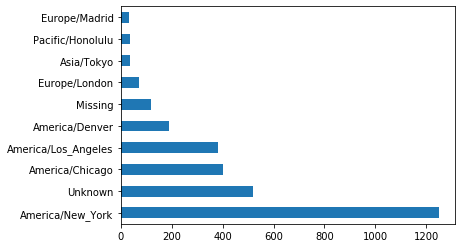

In [69]:
tz_counts[:10].plot(kind='barh')

In [70]:
#split the agent 'a' column and to get the navigator
results = Series([x.split()[0] for x in frame.a.dropna()])

In [71]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

In [73]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [74]:
#DataFrame with true or false if data is not null on column 'a'
cframe = frame[frame.a.notnull()]

#compare where each row is Windows, then write.
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [75]:
by_tz_os = cframe.groupby(['tz', operating_system])

#size(): Return an int representing the number of elements in this object.
#unstack(level=n): Pivot a level of the (necessarily hierarchical) index labels.
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [16]:
#argsort(): Return the integer indices that would sort the Series values.
indexer = agg_counts.sum(1).argsort()
indexer

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [17]:
count_subset = agg_counts.take(indexer)[-10:]

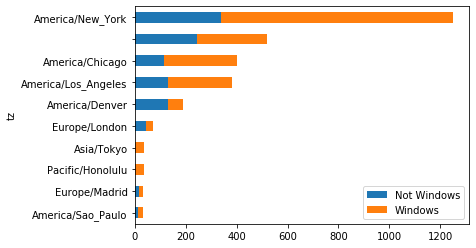

In [18]:
count_subset.plot(kind='barh', stacked=True)

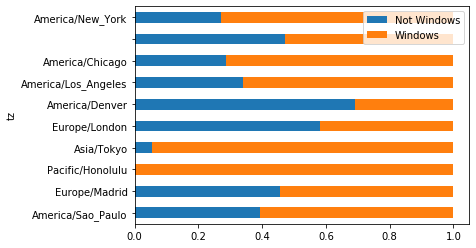

In [19]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

### MovieLens 1M Data Set

Data Link: http://www.grouplens.org/node/73

In [20]:
import pandas as pd

unames = ['user_id','gender','age','occupation','zip']

users = pd.read_table('ml-1m/users.dat', sep='::', header=None,names=unames, engine='python')

rnames = ['user_id','movie_id','rating','timestamp']

ratings = pd.read_table('ml-1m/ratings.dat',sep='::', header=None,names=rnames, engine='python')

mnames = ['movie_id','title','genres']

movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None,names=mnames, engine='python')

As is difficult to analyze the data on 3 tables, we merge the data together to get a single table.

In [21]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [22]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


First, I’m going to filter down to movies that received at least 250 ratings (a completely arbitrary number)

In [23]:
ratings_by_title = data.groupby('title').size()

In [24]:
active_titles = ratings_by_title.index[ratings_by_title >=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

**Now you can select titles with 250 or more ratings only.**

In [25]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [26]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


#### Measuring rating disagreement

Suppose you wanted to find the movies that are most divisive between male and female viewers.

In [27]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [28]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Suppose instead you wanted the movies that elicited the most disagreement among viewers, independent of gender. Disagreement can be measured by the variance or standard deviation of the ratings:

In [29]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title.head()

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [30]:
#Only get active titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False, inplace=True)
rating_std_by_title.head()

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Name: rating, dtype: float64

### US Baby Names 1880-2010

Data Link: https://www.ssa.gov/oact/babynames/limits.html

In [31]:
import pandas as pd

names1880 = pd.read_csv('names/yob1880.txt', names=['name','sex','births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [32]:
total_births_1880 = names1880.groupby(['sex']).births.sum()
total_births_1880

sex
F     90994
M    110490
Name: births, dtype: int64

Since the **data set is split into files by year**, one of the first things to do is to assemble all of the data into a single DataFrame and further to add a year field. This is easy to do using pandas.concat:

In [33]:
#2010 is the last year
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [34]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100738
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2006,1900190,2054166
2007,1921491,2074249
2008,1889593,2038796


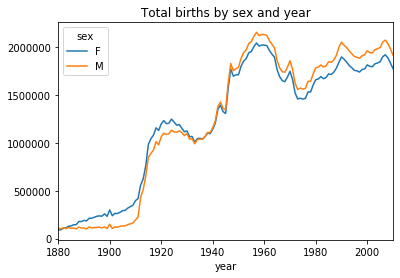

In [35]:
total_births.plot(title='Total births by sex and year')

In [36]:
#Lets add the respective proportion on a given name
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692316,Zymaire,M,5,2010,0.000003
1692317,Zyonne,M,5,2010,0.000003
1692318,Zyquarius,M,5,2010,0.000003
1692319,Zyran,M,5,2010,0.000003


When making this type of operation, its useful to make a sanity check to see if the 'prop' column ads up to 1.

In [37]:
#np.allclose(): Returns True if two arrays are element-wise equal 
#               within a tolerance.
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [38]:
#Now lets get the top 1000 names for each sex/year
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000]) 
top1000 = pd.concat(pieces, ignore_index=True)

In [39]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


#### Analyzing Naming Trends

In [40]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [41]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc4c4fed90>,
      dtype=object)

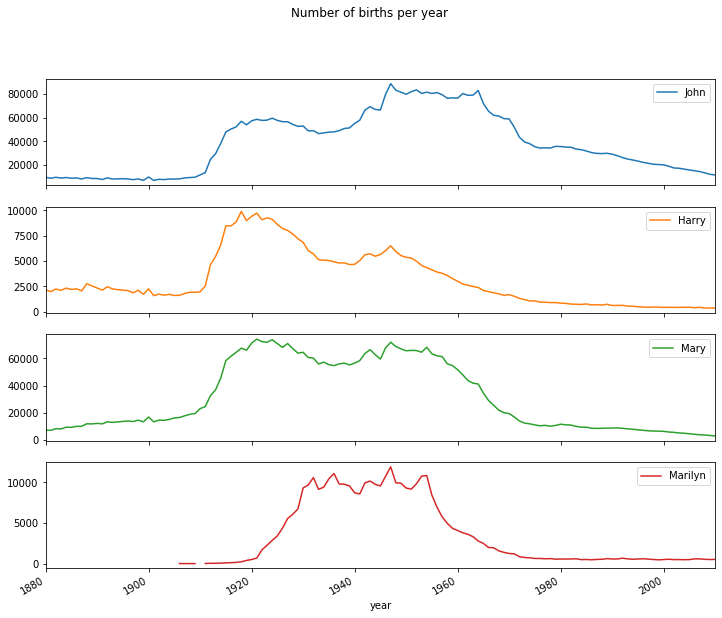

In [42]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

**Measuring the increase in naming diversity**

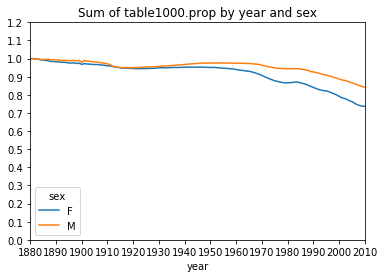

In [43]:
#we can see the proportion of births represented by the top 1000 most popular names.
table = top1000.pivot_table('prop', index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [44]:
#Lets consider the boys names from 2010.
df = boys[boys.year==2010]

In [45]:
#How many of the most popular names it takes to reach 50%.
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

116

Plus 1 since an array starts at 0.

In [46]:
df = boys[boys.year ==1900]
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900.searchsorted(0.5)+1

25

In [47]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False) 
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count) 
diversity = diversity.unstack('sex')

Text(0.5, 1.0, 'Number of popular names in top 50%')

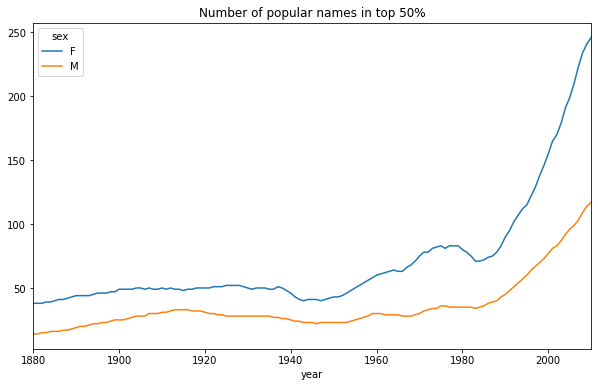

In [48]:
import matplotlib.pyplot as plt

diversity.plot(kind='line', figsize=(10,6))
plt.title('Number of popular names in top 50%')

Girl names have always been more diverse than boys names, both diversifying from 1980 on.

#### The "Last Letter" Revolution

In [49]:
# extract last letter from name column 
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter) 
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   39169.0   38857.0   37871.0   
b                NaN      NaN      NaN  ...   51006.0   49334.0   48123.0   
c                NaN      NaN      NaN  ...   27133.0   27265.0   27726.0   
d             1027.0   1298.0   1374.0  ...   60918.0   55933.0   53465.0   
e            54353.0  66748.0  66662.0  ...  145514.0  144794.0  144937.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38710.0   36913.0   36248.0   34760.0   33046.0   31634.0   
b             45964.0   43216.0   42686.0   42258.0   40098.0   39106.0   
c             26803.0   26125.0   26682.0   26919.0   25402.0   24164.0   
d             51861.0   50782.0   51542.0   50770.0   48095.0   46378.0   
e            142270.0  141336.0  143258.0  144061.0  141405.0  136071.0   

sex                    
year             2010  
last_letter            
a             28882.0  
b             39294.0  
c             23357.0  
d             44851.0  
e            130307.0  

[5 rows x 262 columns]

In [50]:
# reindex(): Conform Series/DataFrame to new index with optional filling logic.
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691278.0  677100.0    977.0    5212.0   28882.0
b                 NaN     694.0     455.0    411.0    3911.0   39294.0
c                 5.0      49.0     957.0    482.0   15457.0   23357.0
d              6751.0    3731.0    2645.0  22113.0  262120.0   44851.0
e            133601.0  435023.0  316878.0  28665.0  178760.0  130307.0

In [51]:
#Next, normalize the table by total births
letter_prop = subtable / subtable.sum().astype(float)

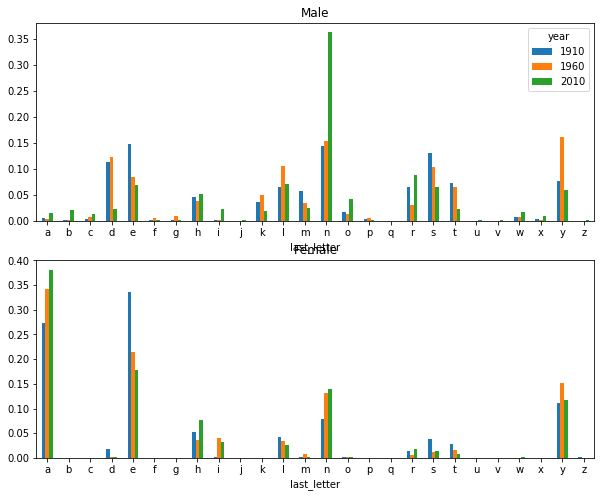

In [52]:
fig, axes = plt.subplots(2,1, figsize=(10, 8)) 
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False) 

In [53]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].transpose()
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153219,0.077458
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


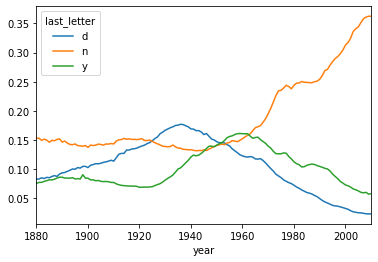

In [54]:
dny_ts.plot()

#### Boy names that became girl names and viceversa

In [55]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [56]:
filtered = top1000[top1000.name.isin(lesley_like)]
print(filtered.head())
filtered.groupby('name').births.sum()

        name sex  births  year      prop
632   Leslie   F       8  1880  0.000088
1108  Leslie   M      79  1880  0.000715
2461  Leslie   F      11  1881  0.000120
3014  Leslie   M      92  1881  0.000913
4511  Leslie   F       9  1882  0.000083


name
Leslee      1082
Lesley     35037
Lesli        929
Leslie    370579
Lesly      10072
Name: births, dtype: int64

In [57]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)
#Normalize the data
table = table.div(table.sum(1), axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


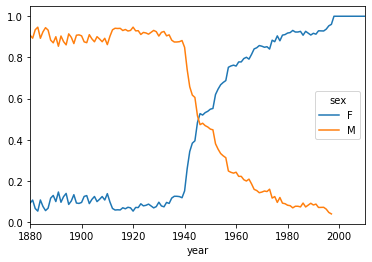

In [58]:
table.plot()

The examples in this chapter are rather simple, but they’re here to give you a bit of a flavor of what sorts of things you can expect in the upcoming chapters. **The focus of this book is on tools as opposed to presenting more sophisticated analytical methods**. Mastering the techniques in this book will enable you to implement your own analyses (assuming you know what you want to do!) in short order.